<a href="https://colab.research.google.com/github/TomODonn/ECGR-4105/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalize the data
t_u_norm = (t_u - t_u.mean()) / t_u.std()

In [3]:
# Nonlinear model: w2 * t_u^2 + w1 * t_u + b
def nonlinear_model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

# Linear model: w * t_u + b
def linear_model(t_u, w, b):
    return w * t_u + b

# Loss function
def loss_fn(y_pred, y):
    return ((y_pred - y) ** 2).mean()

# Training loop for nonlinear model
def train_nonlinear_model(learning_rate, epochs=5000):
    w1 = torch.tensor(1.0, requires_grad=True)
    w2 = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(1.0, requires_grad=True)

    optimizer = optim.SGD([w1, w2, b], lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = nonlinear_model(t_u_norm, w1, w2, b)
        loss = loss_fn(y_pred, t_c)
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            losses.append(loss.item())
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return w1, w2, b, losses

# Training loop for linear model
def train_linear_model(learning_rate, epochs=5000):
    w = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(1.0, requires_grad=True)

    optimizer = optim.SGD([w, b], lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = linear_model(t_u_norm, w, b)
        loss = loss_fn(y_pred, t_c)
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            losses.append(loss.item())
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return w, b, losses

In [4]:
# Train nonlinear model with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
training_results = {}

for lr in learning_rates:
    print(f"Training nonlinear model with learning rate {lr}")
    w1, w2, b, losses = train_nonlinear_model(lr)
    training_results[lr] = (w1, w2, b, losses)

# Pick the best nonlinear model (smallest final loss)
best_lr = min(learning_rates, key=lambda lr: training_results[lr][3][-1])
best_w1, best_w2, best_b, best_losses = training_results[best_lr]

# Train linear model for comparison
print("Training linear model with learning rate 0.01")
w_lin, b_lin, linear_losses = train_linear_model(0.01)

Training nonlinear model with learning rate 0.1
Epoch 0, Loss: 135.8893280029297
Epoch 500, Loss: 2.090719699859619
Epoch 1000, Loss: 2.090719699859619
Epoch 1500, Loss: 2.090719699859619
Epoch 2000, Loss: 2.090719699859619
Epoch 2500, Loss: 2.090719699859619
Epoch 3000, Loss: 2.090719699859619
Epoch 3500, Loss: 2.090719699859619
Epoch 4000, Loss: 2.090719699859619
Epoch 4500, Loss: 2.090719699859619
Training nonlinear model with learning rate 0.01
Epoch 0, Loss: 135.8893280029297
Epoch 500, Loss: 2.0919342041015625
Epoch 1000, Loss: 2.0907201766967773
Epoch 1500, Loss: 2.09071946144104
Epoch 2000, Loss: 2.09071946144104
Epoch 2500, Loss: 2.09071946144104
Epoch 3000, Loss: 2.09071946144104
Epoch 3500, Loss: 2.09071946144104
Epoch 4000, Loss: 2.09071946144104
Epoch 4500, Loss: 2.09071946144104
Training nonlinear model with learning rate 0.001
Epoch 0, Loss: 135.8893280029297
Epoch 500, Loss: 22.987913131713867
Epoch 1000, Loss: 7.343493938446045
Epoch 1500, Loss: 3.6502480506896973
Epoc

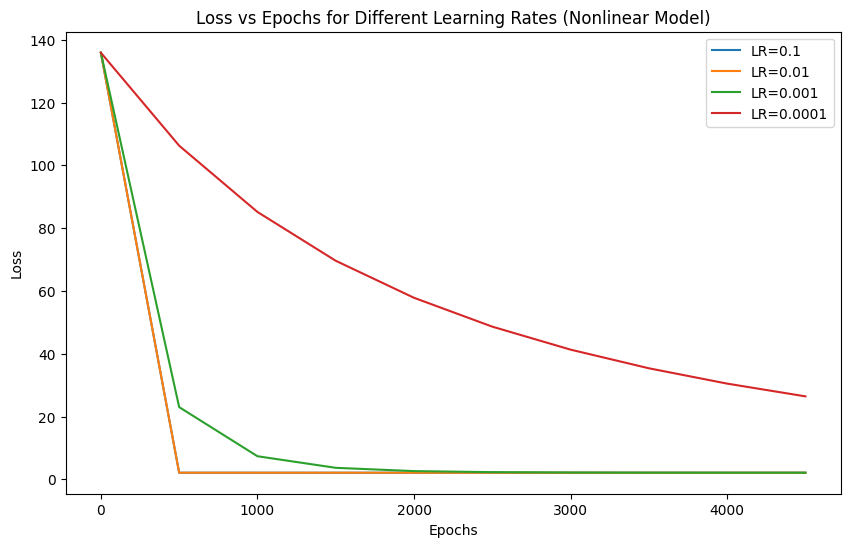

In [5]:
# Plotting losses for nonlinear models
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(0, 5000, 500), training_results[lr][3], label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Learning Rates (Nonlinear Model)')
plt.legend()
plt.show()

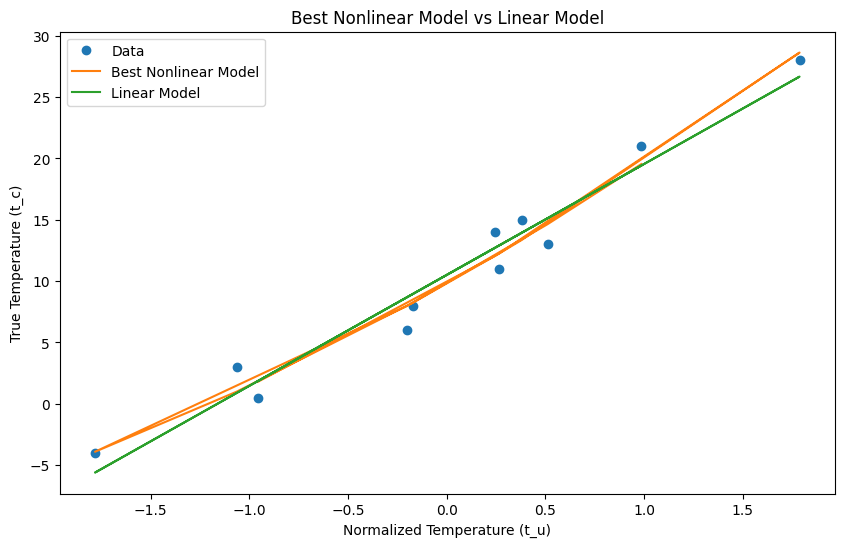

In [6]:
# Plotting the best nonlinear model against the linear model
plt.figure(figsize=(10, 6))
plt.plot(t_u_norm, t_c, 'o', label='Data')
plt.plot(t_u_norm, nonlinear_model(t_u_norm, best_w1, best_w2, best_b).detach(), label='Best Nonlinear Model')
plt.plot(t_u_norm, linear_model(t_u_norm, w_lin, b_lin).detach(), label='Linear Model')
plt.xlabel('Normalized Temperature (t_u)')
plt.ylabel('True Temperature (t_c)')
plt.legend()
plt.title('Best Nonlinear Model vs Linear Model')
plt.show()

In [7]:
# Final best losses
print(f"Best nonlinear model final loss (LR={best_lr}): {best_losses[-1]}")
print(f"Linear model final loss: {linear_losses[-1]}")

Best nonlinear model final loss (LR=0.01): 2.09071946144104
Linear model final loss: 2.927645206451416


In [8]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
# Feature columns and target column
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

# Split the dataset into training and validation sets (80% training, 20% validation)
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract features and target values
X_train = train_data[features].values
y_train = train_data[target].values
X_val = val_data[features].values
y_val = val_data[target].values

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Making values between 0 and 1.
X_train = (X_train - X_train.mean()) / X_train.std()
X_val = (X_val - X_val.mean()) / X_val.std()
y_train = (y_train - y_train.mean()) / y_train.std()
y_val = (y_val - y_val.mean()) / y_val.std()

In [20]:
# Define the linear regression model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(5, 1)

    def forward(self, x):
        return self.linear(x)

# Loss function
def loss_fn(y_pred, y):
    return ((y_pred - y) ** 2).mean()

# Training loop function
def train_model(learning_rate, epochs=5000):
    model = LinearRegressionModel()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-5)  # L2 regularization term
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()

        if epoch % 500 == 0:
            train_losses.append(loss.item())
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                val_loss = loss_fn(val_pred, y_val)
                val_losses.append(val_loss.item())
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

    return model, train_losses, val_losses

In [21]:
# Train models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
training_results = {}

for lr in learning_rates:
    print(f"Training with learning rate {lr}")
    model, train_losses, val_losses = train_model(lr)
    training_results[lr] = (model, train_losses, val_losses)

# Pick the best model (smallest final validation loss)
best_lr = min(learning_rates, key=lambda lr: training_results[lr][2][-1])
best_model, best_train_losses, best_val_losses = training_results[best_lr]


Training with learning rate 0.1
Epoch 0, Training Loss: 1.2358965873718262, Validation Loss: 1.0695233345031738
Epoch 500, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Epoch 1000, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Epoch 1500, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Epoch 2000, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Epoch 2500, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Epoch 3000, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Epoch 3500, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Epoch 4000, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Epoch 4500, Training Loss: 0.4368279278278351, Validation Loss: 0.43054720759391785
Training with learning rate 0.01
Epoch 0, Training Loss: 1.141334891319275, Validation Loss: 1.119949221611023
Epoch 500, Training Lo

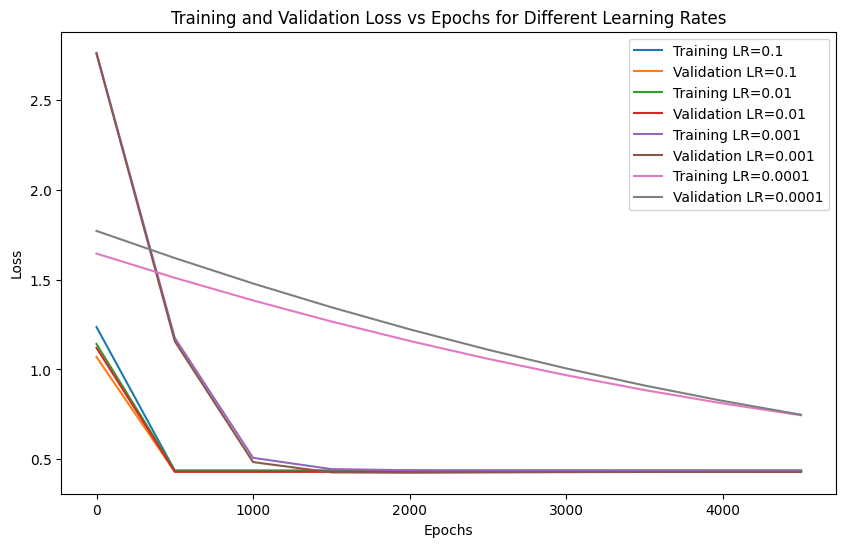

In [22]:
# Plotting losses for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(0, 5000, 500), training_results[lr][1], label=f'Training LR={lr}')
    plt.plot(range(0, 5000, 500), training_results[lr][2], label=f'Validation LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs for Different Learning Rates')
plt.legend()
plt.show()

In [25]:
# Final best losses
print(f"Best model final training loss (LR={best_lr}): {best_train_losses[-1]}")
print(f"Best model final validation loss (LR={best_lr}): {best_val_losses[-1]}")

Best model final training loss (LR=0.001): 0.43683210015296936
Best model final validation loss (LR=0.001): 0.4301629960536957


In [26]:
# Extract the best parameters
best_weights = best_model.linear.weight.detach().numpy().flatten()
best_bias = best_model.linear.bias.detach().numpy().flatten()

print(f"Best model parameters (weights): {best_weights}")
print(f"Best model parameters (bias): {best_bias}")

Best model parameters (weights): [0.3866301  0.06531794 0.32084438 0.24115804 0.16444841]
Best model parameters (bias): [1.2495557e-05]


In [28]:
#Target column
target = 'price'

# Categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Split the dataset into training and validation sets (80% training, 20% validation)
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Split features into categorical and numerical.
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

X_train_numerical = scaler.fit_transform(train_data[numerical_features])
X_val_numerical = scaler.transform(val_data[numerical_features])

X_train_categorical = ohe.fit_transform(train_data[categorical_features])
X_val_categorical = ohe.transform(val_data[categorical_features])

# Extract features and target values
X_train = np.concatenate((X_train_numerical, X_train_categorical.toarray()), axis=1)
X_val = np.concatenate((X_val_numerical, X_val_categorical.toarray()), axis=1)
y_train = train_data[target].values
y_val = val_data[target].values

# Normalize the features
scaler = StandardScaler(with_mean=True)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Making values between 0 and 1.
X_train = (X_train - X_train.mean()) / X_train.std()
X_val = (X_val - X_val.mean()) / X_val.std()
y_train = (y_train - y_train.mean()) / y_train.std()
y_val = (y_val - y_val.mean()) / y_val.std()

In [29]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        nn.init.kaiming_normal_(self.linear.weight)
        nn.init.zeros_(self.linear.bias)

    def forward(self, x):
        return self.linear(x)

# Loss function
def loss_fn(y_pred, y):
    return ((y_pred - y) ** 2).mean()

# Training loop function
def train_model(learning_rate, epochs=5000):
    model = LinearRegressionModel(input_dim=X_train.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            train_losses.append(loss.item())
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                val_loss = loss_fn(val_pred, y_val)
                val_losses.append(val_loss.item())
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

    return model, train_losses, val_losses

In [30]:
# Train models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
training_results = {}

for lr in learning_rates:
    print(f"Training with learning rate {lr}")
    model, train_losses, val_losses = train_model(lr)
    training_results[lr] = (model, train_losses, val_losses)

# Pick the best model (smallest final validation loss)
best_lr = min(learning_rates, key=lambda lr: training_results[lr][2][-1])
best_model, best_train_losses, best_val_losses = training_results[best_lr]

# Extract the best parameters
best_weights = best_model.linear.weight.detach().numpy().flatten()
best_bias = best_model.linear.bias.detach().numpy().flatten()

# Print the best parameters
print(f"Best model parameters (weights): {best_weights}")
print(f"Best model parameters (bias): {best_bias}")


Training with learning rate 0.1
Epoch 0, Training Loss: 2.912417411804199, Validation Loss: 1.4226337671279907
Epoch 500, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Epoch 1000, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Epoch 1500, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Epoch 2000, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Epoch 2500, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Epoch 3000, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Epoch 3500, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Epoch 4000, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Epoch 4500, Training Loss: 0.3133358061313629, Validation Loss: 0.32982179522514343
Training with learning rate 0.01
Epoch 0, Training Loss: 1.9363948106765747, Validation Loss: 1.8460667133331299
Epoch 500, Training L

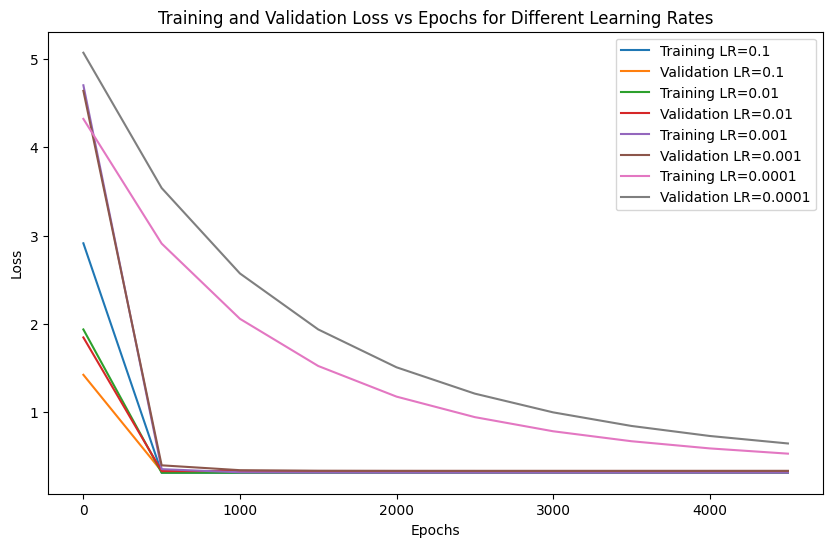

Best model final training loss (LR=0.1): 0.3133358061313629
Best model final validation loss (LR=0.1): 0.32982179522514343


In [31]:
# Plotting losses for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(0, 5000, 500), training_results[lr][1], label=f'Training LR={lr}')
    plt.plot(range(0, 5000, 500), training_results[lr][2], label=f'Validation LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs for Different Learning Rates')
plt.legend()
plt.show()

# Final best losses
print(f"Best model final training loss (LR={best_lr}): {best_train_losses[-1]}")
print(f"Best model final validation loss (LR={best_lr}): {best_val_losses[-1]}")
